## Clickbait headline analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import datetime as dt


In [3]:
abc = pd.read_csv('raw_data/abcnews-date-text.csv') #reputable news

In [4]:
exm = pd.read_csv('raw_data/examiner-date-text.csv') #clickbait

### Changing data types

In [5]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226258 entries, 0 to 1226257
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   publish_date   1226258 non-null  int64 
 1   headline_text  1226258 non-null  object
dtypes: int64(1), object(1)
memory usage: 18.7+ MB


In [6]:
exm.head()

,publish_date,headline_text
0,20100101,100 Most Anticipated books releasing in 2010
1,20100101,10 best films of 2009 - What's on your list?
2,20100101,10 days of free admission at Lan Su Chinese Ga...
3,20100101,10 PlayStation games to watch out for in 2010
4,20100101,10 resolutions for a Happy New Year for you an...


In [7]:
def change_dtype(df, column, new_dtype): #changes data type for df columns
    if df[column].dtype == new_dtype:
        print("Current dtype is the same as", new_dtype)
    elif new_dtype == 'datetime64[ns]':
        df[column] = pd.to_datetime(df[column], format='%Y%m%d')
        return(df)
    else:
        df[column] = df[column].astype(new_dtype)
        return(df)
        

In [8]:
change_dtype(abc,'publish_date','datetime64[ns]' )

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers
...,...,...
1226253,2020-12-31,what abc readers learned from 2020 looking bac...
1226254,2020-12-31,what are the south african and uk variants of ...
1226255,2020-12-31,what victorias coronavirus restrictions mean f...
1226256,2020-12-31,whats life like as an american doctor during c...


In [9]:
change_dtype(abc,'headline_text','str' )

,publish_date,headline_text
0,2003-02-19,aba decides against community broadcasting lic...
1,2003-02-19,act fire witnesses must be aware of defamation
2,2003-02-19,a g calls for infrastructure protection summit
3,2003-02-19,air nz staff in aust strike for pay rise
4,2003-02-19,air nz strike to affect australian travellers
...,...,...
1226253,2020-12-31,what abc readers learned from 2020 looking bac...
1226254,2020-12-31,what are the south african and uk variants of ...
1226255,2020-12-31,what victorias coronavirus restrictions mean f...
1226256,2020-12-31,whats life like as an american doctor during c...


In [10]:
abc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226258 entries, 0 to 1226257
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   publish_date   1226258 non-null  datetime64[ns]
 1   headline_text  1226258 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 18.7+ MB


In [11]:
change_dtype(exm, 'publish_date', 'datetime64[ns]')
change_dtype(exm, 'headline_text', str)

,publish_date,headline_text
0,2010-01-01,100 Most Anticipated books releasing in 2010
1,2010-01-01,10 best films of 2009 - What's on your list?
2,2010-01-01,10 days of free admission at Lan Su Chinese Ga...
3,2010-01-01,10 PlayStation games to watch out for in 2010
4,2010-01-01,10 resolutions for a Happy New Year for you an...
...,...,...
3089776,2015-12-31,"Which is better investment, Lego bricks or gol..."
3089777,2015-12-31,Wild score three unanswered goals to defeat th...
3089778,2015-12-31,"With NASA and Russia on the sidelines, Europe ..."
3089779,2015-12-31,"Wolf Pack battling opponents, officials on the..."


In [12]:
exm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3089781 entries, 0 to 3089780
Data columns (total 2 columns):
 #   Column         Dtype         
---  ------         -----         
 0   publish_date   datetime64[ns]
 1   headline_text  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 47.1+ MB


In [13]:
abc.isna().any()

publish_date     False
headline_text    False
dtype: bool

In [14]:
exm.isna().any()

publish_date     False
headline_text    False
dtype: bool

## Joining dfs together

In [15]:
#adding new column to identify clickbait or not
abc['clickbait'] = 0
exm['clickbait'] = 1

In [16]:
abc.head()

,publish_date,headline_text,clickbait
0,2003-02-19,aba decides against community broadcasting lic...,0
1,2003-02-19,act fire witnesses must be aware of defamation,0
2,2003-02-19,a g calls for infrastructure protection summit,0
3,2003-02-19,air nz staff in aust strike for pay rise,0
4,2003-02-19,air nz strike to affect australian travellers,0


In [17]:
exm.head()

,publish_date,headline_text,clickbait
0,2010-01-01,100 Most Anticipated books releasing in 2010,1
1,2010-01-01,10 best films of 2009 - What's on your list?,1
2,2010-01-01,10 days of free admission at Lan Su Chinese Ga...,1
3,2010-01-01,10 PlayStation games to watch out for in 2010,1
4,2010-01-01,10 resolutions for a Happy New Year for you an...,1


In [18]:
#selecting only the years both dfs have in common
print(exm['publish_date'].min(), exm['publish_date'].max(), exm.shape)
low = exm['publish_date'].min()
high = exm['publish_date'].max()

abc = abc.loc[(abc['publish_date']>=low) & (abc['publish_date']<=high)]
print(abc['publish_date'].min(), abc['publish_date'].max(), abc.shape)

2010-01-01 00:00:00 2015-12-31 00:00:00 (3089781, 3)
2010-01-01 00:00:00 2015-12-31 00:00:00 (492466, 3)


In [19]:
#use concat to combine the two df
df = pd.concat([abc, exm], ignore_index=True)
df.head()

,publish_date,headline_text,clickbait
0,2010-01-01,12m degas stolen from museum,0
1,2010-01-01,17 die in bangladesh bus crash,0
2,2010-01-01,2010 to be drier after very wet 2009,0
3,2010-01-01,37 catholic workers killed worldwide,0
4,2010-01-01,600 hurt in philippine new year revelry,0


# EDA

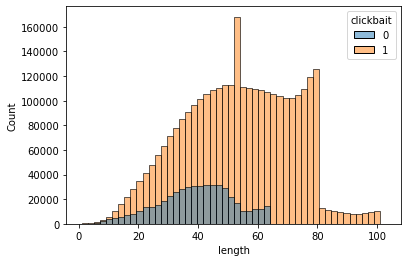

In [20]:
#comparing name length
df['length'] = df['headline_text'].str.len()
df.head()
sns.histplot(df,bins=50, x='length', hue='clickbait')

In [21]:
df.describe()

,clickbait,length
count,3.582247e+06,3.582247e+06
mean,8.625260e-01,5.165683e+01
std,3.443472e-01,1.820707e+01
min,0.000000e+00,1.000000e+00
25%,1.000000e+00,3.800000e+01
50%,1.000000e+00,5.100000e+01
75%,1.000000e+00,6.600000e+01
max,1.000000e+00,1.030000e+02


## Removing stop words


In [22]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize


In [23]:
df['headline_text'] = df['headline_text'].apply(lambda x: [y for y in x.split()])

In [24]:
stop = stopwords.words('english')

df['no_stop'] = df['headline_text'].apply(lambda x:[y for y in x if y not in stop])

In [25]:
df.head()

,publish_date,headline_text,clickbait,length,no_stop
0,2010-01-01,"[12m, degas, stolen, from, museum]",0,28,"[12m, degas, stolen, museum]"
1,2010-01-01,"[17, die, in, bangladesh, bus, crash]",0,30,"[17, die, bangladesh, bus, crash]"
2,2010-01-01,"[2010, to, be, drier, after, very, wet, 2009]",0,36,"[2010, drier, wet, 2009]"
3,2010-01-01,"[37, catholic, workers, killed, worldwide]",0,36,"[37, catholic, workers, killed, worldwide]"
4,2010-01-01,"[600, hurt, in, philippine, new, year, revelry]",0,39,"[600, hurt, philippine, new, year, revelry]"
